### Download Necessary Files

In [ ]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/mj-clean.csv")      

### 12-1 

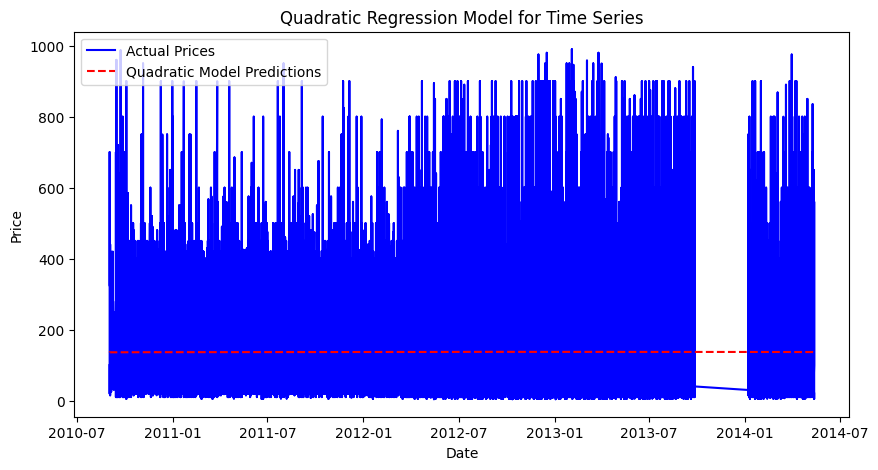

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7725
Date:                Sat, 15 Feb 2025   Prob (F-statistic):              0.462
Time:                        10:21:04   Log-Likelihood:            -9.1304e+05
No. Observations:              147070   AIC:                         1.826e+06
Df Residuals:                  147067   BIC:                         1.826e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          136.1712      0.940    144.798   

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("mj-clean.csv", parse_dates=[5])
df.set_index("date", inplace=True)
df["time"] = np.arange(len(df))  # Convert dates to numerical values
df["time_squared"] = df["time"] ** 2  # Quadratic term

# Define independent variables (time and time squared)
X = df[["time", "time_squared"]]
X = sm.add_constant(X)  # Add intercept term
y = df["price"]

# Fit the quadratic regression model
model = sm.OLS(y, X).fit()

# Generate predictions
df["predicted_price"] = model.predict(X)

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["price"], label="Actual Prices", color="blue")
plt.plot(df.index, df["predicted_price"], label="Quadratic Model Predictions", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Quadratic Regression Model for Time Series")
plt.legend()
plt.show()

# Print model summary
print(model.summary())